In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
from pyomo.environ import *
from pyomo.environ import RangeSet
from pyomo.environ import value

# Ecoinvent (background) + Literature (foreground)

# 1. Base Case (BAU)

In [3]:
A_BAU_url = "https://raw.githubusercontent.com/FarshidNazemi/Plastic-Packaging/main/csv-files/Technology%20Matrix%20(A)%20-%20BAU.csv"
B_BAU_url = "https://raw.githubusercontent.com/FarshidNazemi/Plastic-Packaging/main/csv-files/Environmental%20Matrix%20(B)%20-%20BAU.csv"
C_BAU_url = "https://raw.githubusercontent.com/FarshidNazemi/Plastic-Packaging/main/csv-files/Characterization%20Matrix%20(C)%20-%20BAU.csv"

In [4]:
A_BAU_df = pd.read_csv(A_BAU_url,header=None)
B_BAU_df = pd.read_csv(B_BAU_url,header=None)
C_BAU_df = pd.read_csv(C_BAU_url,header=None)

In [5]:
A_BAU_df_org = A_BAU_df
B_BAU_df_org = B_BAU_df
C_BAU_df_org = C_BAU_df

In [6]:
#Building A matrix
# Step 1: Delete the first 10 columns
A_BAU_df = A_BAU_df.drop(A_BAU_df.columns[:10], axis=1)

# Step 2: Delete the first 10 rows (first row is heading, so put 3)
A_BAU_df = A_BAU_df.iloc[10:]

#Replacing empty values with zero and getting the final A matrix
A_BAU=A_BAU_df
A_BAU=A_BAU.replace(np.nan, 0)
A_BAU=np.array(A_BAU,dtype='float64')

In [7]:
# Building B matrix
# Step 1: Delete the first 7 columns
B_BAU_df = B_BAU_df.drop(B_BAU_df.columns[:7], axis=1)

# Step 2: Delete the first 10 rows (first row is heading, so put 3)
B_BAU_df = B_BAU_df.iloc[10:]

# Replacing empty values with zero
B_BAU_df = B_BAU_df.replace(np.nan, 0)

# Converting all elements to float, handling empty strings and stripping whitespace
def convert_to_float(x):
    if isinstance(x, str):
        x = x.strip()  # Remove any leading/trailing whitespace
        if x == '':  # Handle empty strings
            return 0.0
        try:
            return float(x)
        except ValueError:
            return 0.0  # Or raise an error if you want to catch non-numeric strings
    return x

B_BAU_df = B_BAU_df.applymap(convert_to_float)

# Converting to a NumPy array
B_BAU = np.array(B_BAU_df, dtype=float)

In [8]:
#Building C matrix
# Step 1: Delete the first 7 columns
C_BAU_df = C_BAU_df.drop(C_BAU_df.columns[:7], axis=1)

# Step 2: Delete the first 5 rows (first row is heading, so put 3)
C_BAU_df = C_BAU_df.iloc[5:]

#Replacing empty values with zero and getting the final B matrix
C_BAU=C_BAU_df
C_BAU=C_BAU.replace(np.nan, 0)
C_BAU=np.array(C_BAU,dtype='float64')

In [9]:
#Functional Unit
# F = 168.450 million metric tons = 168,450,000 metric tons = 168,450,000,000 kg
F=168450000000
F=int(F)
#defining f matrix
f=np.zeros(len(A_BAU))
f[0]=F

In [10]:
#Scaling factor
s_BAU=np.linalg.inv(A_BAU)@np.transpose(f)

In [11]:
#Emissions
g_BAU=B_BAU@s_BAU

In [12]:
#Impacts
TI_BAU=np.transpose(C_BAU)@g_BAU

In [13]:
GWP_BAU = TI[3]

NameError: name 'TI' is not defined

In [14]:
GWP_BAU_per_kg = GWP_BAU/F

NameError: name 'GWP_BAU' is not defined

# 2. Min GWP

In [97]:
A_url = "https://raw.githubusercontent.com/FarshidNazemi/Plastic-Packaging/main/csv-files/Technology%20Matrix%20(A)%20-%20Design.csv"
B_url = "https://raw.githubusercontent.com/FarshidNazemi/Plastic-Packaging/main/csv-files/Environmental%20Matrix%20(B)%20-%20Design.csv"
C_url = "https://raw.githubusercontent.com/FarshidNazemi/Plastic-Packaging/main/csv-files/Characterization%20Matrix%20(C)%20-%20Design.csv"

In [98]:
A_df = pd.read_csv(A_url,header=None)
B_df = pd.read_csv(B_url,header=None)
C_df = pd.read_csv(C_url,header=None)

In [99]:
A_df_org = A_df
B_df_org = B_df
C_df_org = C_df

In [100]:
#Building A matrix
# Step 1: Delete the first 4 columns
A_df = A_df.drop(A_df.columns[:4], axis=1)

# Step 2: Delete the first 4 rows (first row is heading, so put 3)
A_df = A_df.iloc[4:]

#Replacing empty values with zero and getting the final A matrix
A=A_df
A=A.replace(np.nan, 0)
A=np.array(A,dtype='float64')

In [101]:
# Building B matrix
# Step 1: Delete the first 6 columns
B_df = B_df.drop(B_df.columns[:6], axis=1)

# Step 2: Delete the first 4 rows (first row is heading, so put 3)
B_df = B_df.iloc[4:]

# Replacing empty values with zero
B_df = B_df.replace(np.nan, 0)

# Converting all elements to float, handling empty strings and stripping whitespace
def convert_to_float(x):
    if isinstance(x, str):
        x = x.strip()  # Remove any leading/trailing whitespace
        if x == '':  # Handle empty strings
            return 0.0
        try:
            return float(x)
        except ValueError:
            return 0.0  # Or raise an error if you want to catch non-numeric strings
    return x

B_df = B_df.applymap(convert_to_float)

# Converting to a NumPy array
B = np.array(B_df, dtype=float)

In [102]:
#Building C matrix
# Step 1: Delete the first 6 columns
C_df = C_df.drop(C_df.columns[:6], axis=1)

# Step 2: Delete the first 5 rows (first row is heading, so put 3)
C_df = C_df.iloc[5:]

#Replacing empty values with zero and getting the final B matrix
C=C_df
C=C.replace(np.nan, 0)
C=np.array(C,dtype='float64')

In [103]:
#Functional Unit
# F = 168.450 million metric tons = 168,450,000 metric tons = 168,450,000,000 kg
F=168450000000
F=int(F)
#defining f matrix
f=np.zeros(len(A))
f[0]=F

# 2.1. Without carbon sequestration

In [104]:
C_gwp_wo_seq= np.transpose(C)[[0]]
coef_GWP_wo_seq=C_gwp_wo_seq@B
coef_GWP_wo_seq=np.array(coef_GWP_wo_seq)
coef_GWP_wo_seq = coef_GWP_wo_seq.reshape(-1)

In [105]:
#Model Formulation
# Create the model
model = ConcreteModel()
# List of processes with negative scaling factor due to open loop recovery and substitution approach
negative_s_indices = []
positive_s_indices = []
all_s_indices = []
search_elements_zero_or_negative = [
    'polyester fibre production, finished | fibre, polyester | APOS, S',
    'market for sawlog and veneer log, softwood, debarked, measured as solid wood | sawlog and veneer log, softwood, debarked, measured as solid wood | APOS, S',
    'pitch production, petroleum refinery operation | pitch | APOS, S',
    'lignite mine operation | lignite | APOS, S',
    'naphtha production, petroleum refinery operation | naphtha | APOS, S',
    'sodium sulfate production, from natural sources | sodium sulfate, anhydrite | APOS, S',
    'methanol production | methanol | APOS, S',
    'petroleum production, onshore | petroleum | APOS, S'
]

search_elements_zero_or_negative_or_positive = [
    'polyester fibre production, finished | fibre, polyester | APOS, S',
    'market for sawlog and veneer log, softwood, debarked, measured as solid wood | sawlog and veneer log, softwood, debarked, measured as solid wood | APOS, S',
    'pitch production, petroleum refinery operation | pitch | APOS, S',
    'lignite mine operation | lignite | APOS, S',
    'market group for electricity, medium voltage | electricity, medium voltage | APOS, S',
    'heat production, natural gas, at industrial furnace low-NOx >100kW | heat, district or industrial, natural gas | APOS, S',
    'naphtha production, petroleum refinery operation | naphtha | APOS, S',
    'sodium sulfate production, from natural sources | sodium sulfate, anhydrite | APOS, S',
    'methanol production | methanol | APOS, S',
    'petroleum production, onshore | petroleum | APOS, S'
]

# Search for elements in the first row of the DataFrame
negative_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_zero_or_negative]
negative_s_indices = [i-3 for i in negative_s_indices]
negative_or_positive_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_zero_or_negative_or_positive]
negative_or_positive_s_indices = [i-3 for i in negative_or_positive_s_indices]
all_s_indices = list(range(1, len(np.transpose(A))+1))
positive_s_indices = [index for index in all_s_indices if index not in negative_or_positive_s_indices]

# Define the decision variable
model.set_s = RangeSet(len(np.transpose(A)))
model.s = Var(model.set_s)
model.set_negative_scale = Set(initialize=negative_s_indices)
model.set_positive_scale = Set(initialize=positive_s_indices)

e = 0
#model constraint: As = f and s>=0
model.set_balance = RangeSet(len(f))
def balance(model, p): # As = f
    return sum(A[p-1,i-1]*model.s[i] for i in model.set_s) == f[p-1]
def negative_scale(model, i):
    return (model.s[i]<=0)
def positive_scale(model, i):
    return (model.s[i]>=e)

model.balance_constraints = Constraint(model.set_balance, rule=balance)
model.negative_scale_constraints = Constraint(model.set_negative_scale, rule=negative_scale)
model.positive_scale_constraints = Constraint(model.set_positive_scale, rule=positive_scale)

model.obj = Objective(expr = sum(coef_GWP_wo_seq[i-1]*model.s[i] for i in model.set_s), sense=minimize)
#Solver
solver = SolverFactory('gurobi')
solver.solve(model) # solves and updates instance

{'Problem': [{'Name': 'x144', 'Lower bound': 207945704446.84888, 'Upper bound': 207945704446.84888, 'Number of objectives': 1, 'Number of constraints': 259, 'Number of variables': 144, 'Number of binary variables': 0, 'Number of integer variables': 0, 'Number of continuous variables': 144, 'Number of nonzeros': 613, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '0.009699106216430664', 'Error rc': 0, 'Time': 0.2440190315246582}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [106]:
#total CO2 emission (kg CO2eq)
GWP_best_wo_seq = value(model.obj)

In [107]:
#kg CO2 eq per kg of packaging product
GWP_best_wo_seq_per_kg = value(model.obj)/168450000000 

In [108]:
scaling_factors_wo_seq = []
for j in model.s:
    scaling_factors_wo_seq.append(model.s[j].value)  

In [110]:
#1. monomer production
#ethylene
ethylene_s_indices = []
scaling_factors_ethylene = []
search_elements_ethylene = [
    'Bio-ethylene production (monomer)',
    'Fossil-ethylene production',
    'pyrolysis (monomer production), HDPE sorted',
    'pyrolysis (monomer production), LDPE sorted'
]
ethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_ethylene]
ethylene_s_indices = [i-3 for i in ethylene_s_indices]
for j in ethylene_s_indices:
    scaling_factors_ethylene.append(model.s[j].value)
scaling_factors_ethylene

[0.0, 33098060713.931583, 0.0, 0.0]

In [111]:
#propylene
propylene_s_indices = []
scaling_factors_propylene = []
search_elements_propylene = [
    'Bio-propylene production (monomer)',
    'Fossil-propylene production',
    'pyrolysis (monomer production), PP sorted',
]
propylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_propylene]
propylene_s_indices = [i-3 for i in propylene_s_indices]
for j in propylene_s_indices:
    scaling_factors_propylene.append(model.s[j].value)
scaling_factors_propylene   

[0.0, 22019756923.577263, 0.0]

In [112]:
#MEG
MEG_s_indices = []
scaling_factors_MEG = []
search_elements_MEG = [
    'Bio-MEG production (monomer)',
    'Fossil-MEG production',
    'depolymerization, enzymatic hydrolysis, PET sorted',
    'depolymerization, glycolysis, PET sorted'
]
MEG_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_MEG]
MEG_s_indices = [i-3 for i in MEG_s_indices]
for j in MEG_s_indices:
    scaling_factors_MEG.append(model.s[j].value)
scaling_factors_MEG   

[12986265878.469458, 0.0, 0.0, 0.0]

In [113]:
#styrene
styrene_s_indices = []
scaling_factors_styrene = []
search_elements_styrene = [
    'Bio-styrene production',
    'Fossil-styrene production',
    'chemical recycling with metal oxide, PS sorted',
]
styrene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_styrene]
styrene_s_indices = [i-3 for i in styrene_s_indices]
for j in styrene_s_indices:
    scaling_factors_styrene.append(model.s[j].value)
scaling_factors_styrene 

[0.0, 3826492573.634829, 0.0]

In [114]:
#vinyl chloride
vinyl_chloride_s_indices = []
scaling_factors_vinyl_chloride = []
search_elements_vinyl_chloride = [
    'Bio-vinyl chloride production',
    'Fossil-vinyl chloride production',
]
vinyl_chloride_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_vinyl_chloride]
vinyl_chloride_s_indices = [i-3 for i in vinyl_chloride_s_indices]
for j in vinyl_chloride_s_indices:
    scaling_factors_vinyl_chloride.append(model.s[j].value)
scaling_factors_vinyl_chloride  

[0.0, 1550461025.7619388]

In [115]:
# 2. polymers
#polyethylene
scaling_factors_polyethylene = []
polyethylene_s_indices = []
search_elements_polyethylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'LDPE production',
    'mechanical recycling, LDPE sorted'
]
polyethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polyethylene]
polyethylene_s_indices = [i-3 for i in polyethylene_s_indices]
for j in polyethylene_s_indices:
    scaling_factors_polyethylene.append(model.s[j].value)
scaling_factors_polyethylene

[0.0, 0.0, 15167211066.286575, 21419440097.623497]

In [116]:
#polyethylene
scaling_factors_polyethylene = []
polyethylene_s_indices = []
search_elements_polyethylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'HDPE production',
    'mechanical recycling, HDPE sorted'
]
polyethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polyethylene]
polyethylene_s_indices = [i-3 for i in polyethylene_s_indices]
for j in polyethylene_s_indices:
    scaling_factors_polyethylene.append(model.s[j].value)
scaling_factors_polyethylene

[0.0, 0.0, 16399839159.200356, 22546548474.0855]

In [117]:
#polypropylene
scaling_factors_polypropylene = []
polypropylene_s_indices = []
search_elements_polypropylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PP production',
    'mechanical recycling, PP sorted'
]
polypropylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polypropylene]
polypropylene_s_indices = [i-3 for i in polypropylene_s_indices]
for j in polypropylene_s_indices:
    scaling_factors_polypropylene.append(model.s[j].value)
scaling_factors_polypropylene

[0.0, 0.0, 22303908720.678707, 30663481156.149002]

In [118]:
#polyethylene terephthalate
scaling_factors_PET = []
PET_s_indices = []
search_elements_PET = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PET production',
    'mechanical recycling, PET sorted'
]
PET_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PET]
PET_s_indices = [i-3 for i in PET_s_indices]
for j in PET_s_indices:
    scaling_factors_PET.append(model.s[j].value)
scaling_factors_PET

[0.0, 0.0, 37641350.37237524, 0.0]

In [119]:
#polystyrene terephthalate
scaling_factors_PS = []
PS_s_indices = []
search_elements_PS = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PS production',
    'mechanical recycling, PS sorted'
]
PS_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PS]
PS_s_indices = [i-3 for i in PS_s_indices]
for j in PS_s_indices:
    scaling_factors_PS.append(model.s[j].value)
scaling_factors_PS

[0.0, 0.0, 3826492573.634829, 5260673565.2901]

In [120]:
#polyvinyl chloride
scaling_factors_PVC = []
PVC_s_indices = []
search_elements_PVC = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PVC production',
    'mechanical recycling, PVC sorted'
]
PVC_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PVC]
PVC_s_indices = [i-3 for i in PVC_s_indices]
for j in PVC_s_indices:
    scaling_factors_PVC.append(model.s[j].value)
scaling_factors_PVC

[0.0, 0.0, 1547937887.0061188, 2004342.4575233862]

In [121]:
#3. mixed plastic collected waste (sorting, energy recovery, landfill, mismanaged)

scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
    'incineration, electricity recovery, plastic packaging waste',
    'landfill, plastic packaging waste',
    'Mismanaged waste treatment, uncontrolled landfill, plastic packaging waste',
    'sorting, non-optical manual and automatic sorter (commercial)',
    'sorting, optiacl sorter (commercial)',
    'sorting, optical with film sorter (commercial)',
    'sorting, optical with film, multilayer, and AI sorter (emerging)'
]
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-3 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[0.0, 0.0, 0.0, 0.0, 0.0, 160027500000.0, 0.0]

In [122]:
#4. mixed plastic waste, sorted (sorting, energy recovery, landfill, mismanaged)

scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
    'cement clinker, mixed plastic packaging,sorted',
    'gasification to methanol, mixed plastic waste sorted',
    'plastic lumber production, mixed plastic waste, sorted',
    'pyrolysis, feedstock recycling, mixed plastic waste, sorted',
    'PET fiber production, PET sorted',
    'road pavement production, mixed plastic waste, sorted'
]
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-3 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[0.0, 0.0, 0.0, 0.0, 17954731.037239607, 17683038750.0]

# 2.2. With carbon sequestration

In [124]:
C_gwp_with_seq= np.transpose(C)[[1]]
coef_GWP_with_seq=C_gwp_with_seq@B
coef_GWP_with_seq=np.array(coef_GWP_with_seq)
coef_GWP_with_seq = coef_GWP_with_seq.reshape(-1)

In [125]:
#Model Formulation
# Create the model
model = ConcreteModel()
# List of processes with negative scaling factor due to open loop recovery and substitution approach
negative_s_indices = []
positive_s_indices = []
all_s_indices = []
search_elements_zero_or_negative = [
    'polyester fibre production, finished | fibre, polyester | APOS, S',
    'market for sawlog and veneer log, softwood, debarked, measured as solid wood | sawlog and veneer log, softwood, debarked, measured as solid wood | APOS, S',
    'pitch production, petroleum refinery operation | pitch | APOS, S',
    'lignite mine operation | lignite | APOS, S',
    'naphtha production, petroleum refinery operation | naphtha | APOS, S',
    'sodium sulfate production, from natural sources | sodium sulfate, anhydrite | APOS, S',
    'methanol production | methanol | APOS, S',
    'petroleum production, onshore | petroleum | APOS, S'
]

search_elements_zero_or_negative_or_positive = [
    'polyester fibre production, finished | fibre, polyester | APOS, S',
    'market for sawlog and veneer log, softwood, debarked, measured as solid wood | sawlog and veneer log, softwood, debarked, measured as solid wood | APOS, S',
    'pitch production, petroleum refinery operation | pitch | APOS, S',
    'lignite mine operation | lignite | APOS, S',
    'market group for electricity, medium voltage | electricity, medium voltage | APOS, S',
    'heat production, natural gas, at industrial furnace low-NOx >100kW | heat, district or industrial, natural gas | APOS, S',
    'naphtha production, petroleum refinery operation | naphtha | APOS, S',
    'sodium sulfate production, from natural sources | sodium sulfate, anhydrite | APOS, S',
    'methanol production | methanol | APOS, S',
    'petroleum production, onshore | petroleum | APOS, S'
]

# Search for elements in the first row of the DataFrame
negative_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_zero_or_negative]
negative_s_indices = [i-3 for i in negative_s_indices]
negative_or_positive_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_zero_or_negative_or_positive]
negative_or_positive_s_indices = [i-3 for i in negative_or_positive_s_indices]
all_s_indices = list(range(1, len(np.transpose(A))+1))
positive_s_indices = [index for index in all_s_indices if index not in negative_or_positive_s_indices]

# Define the decision variable
model.set_s = RangeSet(len(np.transpose(A)))
model.s = Var(model.set_s)
model.set_negative_scale = Set(initialize=negative_s_indices)
model.set_positive_scale = Set(initialize=positive_s_indices)

e = 0
#model constraint: As = f and s>=0
model.set_balance = RangeSet(len(f))
def balance(model, p): # As = f
    return sum(A[p-1,i-1]*model.s[i] for i in model.set_s) == f[p-1]
def negative_scale(model, i):
    return (model.s[i]<=0)
def positive_scale(model, i):
    return (model.s[i]>=e)

model.balance_constraints = Constraint(model.set_balance, rule=balance)
model.negative_scale_constraints = Constraint(model.set_negative_scale, rule=negative_scale)
model.positive_scale_constraints = Constraint(model.set_positive_scale, rule=positive_scale)

model.obj = Objective(expr = sum(coef_GWP_with_seq[i-1]*model.s[i] for i in model.set_s), sense=minimize)
#Solver
solver = SolverFactory('gurobi')
solver.solve(model) # solves and updates instance

{'Problem': [{'Name': 'x144', 'Lower bound': -469127077764.38354, 'Upper bound': -469127077764.38354, 'Number of objectives': 1, 'Number of constraints': 259, 'Number of variables': 144, 'Number of binary variables': 0, 'Number of integer variables': 0, 'Number of continuous variables': 144, 'Number of nonzeros': 613, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '0.0006959438323974609', 'Error rc': 0, 'Time': 0.10356807708740234}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [126]:
#total CO2 emission (kg CO2eq)
GWP_best_with_seq = value(model.obj)

In [127]:
#kg CO2 eq per kg of packaging product
GWP_best_with_seq_per_kg = value(model.obj)/168450000000 

In [128]:
scaling_factors_with_seq = []
for j in model.s:
    scaling_factors_with_seq.append(model.s[j].value)  

In [129]:
#1. monomer production
#ethylene
ethylene_s_indices = []
scaling_factors_ethylene = []
search_elements_ethylene = [
    'Bio-ethylene production (monomer)',
    'Fossil-ethylene production',
    'pyrolysis (monomer production), HDPE sorted',
    'pyrolysis (monomer production), LDPE sorted'
]
ethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_ethylene]
ethylene_s_indices = [i-3 for i in ethylene_s_indices]
for j in ethylene_s_indices:
    scaling_factors_ethylene.append(model.s[j].value)
scaling_factors_ethylene

[74362954650.72348, 0.0, 0.0, 0.0]

In [130]:
#propylene
propylene_s_indices = []
scaling_factors_propylene = []
search_elements_propylene = [
    'Bio-propylene production (monomer)',
    'Fossil-propylene production',
    'pyrolysis (monomer production), PP sorted',
]
propylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_propylene]
propylene_s_indices = [i-3 for i in propylene_s_indices]
for j in propylene_s_indices:
    scaling_factors_propylene.append(model.s[j].value)
scaling_factors_propylene   

[770621074.548914, 0.0, 0.0]

In [131]:
#MEG
MEG_s_indices = []
scaling_factors_MEG = []
search_elements_MEG = [
    'Bio-MEG production (monomer)',
    'Fossil-MEG production',
    'depolymerization, enzymatic hydrolysis, PET sorted',
    'depolymerization, glycolysis, PET sorted'
]
MEG_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_MEG]
MEG_s_indices = [i-3 for i in MEG_s_indices]
for j in MEG_s_indices:
    scaling_factors_MEG.append(model.s[j].value)
scaling_factors_MEG   

[12986265878.469458, 0.0, 0.0, 0.0]

In [132]:
#styrene
styrene_s_indices = []
scaling_factors_styrene = []
search_elements_styrene = [
    'Bio-styrene production',
    'Fossil-styrene production',
    'chemical recycling with metal oxide, PS sorted',
]
styrene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_styrene]
styrene_s_indices = [i-3 for i in styrene_s_indices]
for j in styrene_s_indices:
    scaling_factors_styrene.append(model.s[j].value)
scaling_factors_styrene 

[8490211206.103636, 0.0, 0.0]

In [133]:
#vinyl chloride
vinyl_chloride_s_indices = []
scaling_factors_vinyl_chloride = []
search_elements_vinyl_chloride = [
    'Bio-vinyl chloride production',
    'Fossil-vinyl chloride production',
]
vinyl_chloride_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_vinyl_chloride]
vinyl_chloride_s_indices = [i-3 for i in vinyl_chloride_s_indices]
for j in vinyl_chloride_s_indices:
    scaling_factors_vinyl_chloride.append(model.s[j].value)
scaling_factors_vinyl_chloride  

[3564093390.0982757, 0.0]

In [134]:
# 2. polymers
#polyethylene
scaling_factors_polyethylene = []
polyethylene_s_indices = []
search_elements_polyethylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'LDPE production',
    'mechanical recycling, LDPE sorted'
]
polyethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polyethylene]
polyethylene_s_indices = [i-3 for i in polyethylene_s_indices]
for j in polyethylene_s_indices:
    scaling_factors_polyethylene.append(model.s[j].value)
scaling_factors_polyethylene

[0.0, 0.0, 34568875648.39365, 0.0]

In [135]:
#polyethylene
scaling_factors_polyethylene = []
polyethylene_s_indices = []
search_elements_polyethylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'HDPE production',
    'mechanical recycling, HDPE sorted'
]
polyethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polyethylene]
polyethylene_s_indices = [i-3 for i in polyethylene_s_indices]
for j in polyethylene_s_indices:
    scaling_factors_polyethylene.append(model.s[j].value)
scaling_factors_polyethylene

[0.0, 0.0, 36387918045.189, 0.0]

In [136]:
#polypropylene
scaling_factors_polypropylene = []
polypropylene_s_indices = []
search_elements_polypropylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PP production',
    'mechanical recycling, PP sorted'
]
polypropylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polypropylene]
polypropylene_s_indices = [i-3 for i in polypropylene_s_indices]
for j in polypropylene_s_indices:
    scaling_factors_polypropylene.append(model.s[j].value)
scaling_factors_polypropylene

[0.0, 0.0, 49487851352.6337, 0.0]

In [137]:
#polyethylene terephthalate
scaling_factors_PET = []
PET_s_indices = []
search_elements_PET = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PET production',
    'mechanical recycling, PET sorted'
]
PET_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PET]
PET_s_indices = [i-3 for i in PET_s_indices]
for j in PET_s_indices:
    scaling_factors_PET.append(model.s[j].value)
scaling_factors_PET

[0.0, 0.0, 37641350.37237524, 0.0]

In [138]:
#polystyrene terephthalate
scaling_factors_PS = []
PS_s_indices = []
search_elements_PS = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PS production',
    'mechanical recycling, PS sorted'
]
PS_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PS]
PS_s_indices = [i-3 for i in PS_s_indices]
for j in PS_s_indices:
    scaling_factors_PS.append(model.s[j].value)
scaling_factors_PS

[0.0, 0.0, 8490211206.103636, 0.0]

In [139]:
#polyvinyl chloride
scaling_factors_PVC = []
PVC_s_indices = []
search_elements_PVC = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PVC production',
    'mechanical recycling, PVC sorted'
]
PVC_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PVC]
PVC_s_indices = [i-3 for i in PVC_s_indices]
for j in PVC_s_indices:
    scaling_factors_PVC.append(model.s[j].value)
scaling_factors_PVC

[0.0, 0.0, 3558293371.9020753, 0.0]

In [140]:
#3. mixed plastic collected waste (sorting, energy recovery, landfill, mismanaged)

scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
    'incineration, electricity recovery, plastic packaging waste',
    'landfill, plastic packaging waste',
    'Mismanaged waste treatment, uncontrolled landfill, plastic packaging waste',
    'sorting, non-optical manual and automatic sorter (commercial)',
    'sorting, optiacl sorter (commercial)',
    'sorting, optical with film sorter (commercial)',
    'sorting, optical with film, multilayer, and AI sorter (emerging)'
]
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-3 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[0.0, 0.0, 0.0, 160027500000.0, 0.0, 0.0, 0.0]

In [141]:
#4. mixed plastic waste, sorted (sorting, energy recovery, landfill, mismanaged)

scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
    'cement clinker, mixed plastic packaging,sorted',
    'gasification to methanol, mixed plastic waste sorted',
    'plastic lumber production, mixed plastic waste, sorted',
    'pyrolysis, feedstock recycling, mixed plastic waste, sorted',
    'PET fiber production, PET sorted',
    'road pavement production, mixed plastic waste, sorted'
]
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-3 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[0.0, 0.0, 0.0, 0.0, 0.0, 70732155000.0]

# 3. Data Visualization

# 3.1. GWP Comparison b/w scenarios

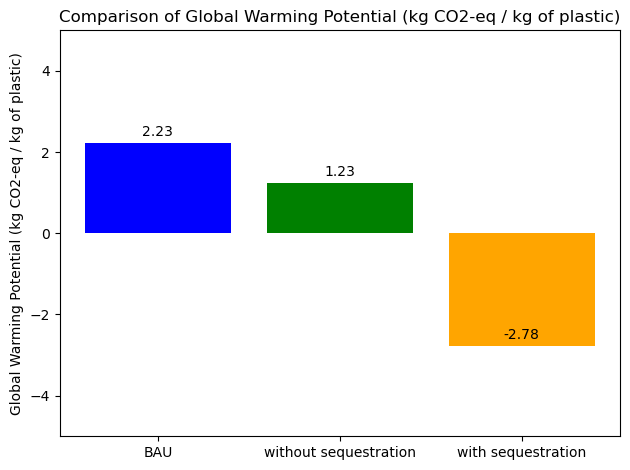

In [146]:
labels = ['BAU', 'without sequestration', 'with sequestration']
values = [round(GWP_BAU_per_kg,2), round(GWP_best_wo_seq_per_kg,2), round(GWP_best_with_seq_per_kg,2)]  # Example values for GWP_BAU_per_kg, GWP_with_seq, GWP_wo_seq
y_label = 'Global Warming Potential (kg CO2-eq / kg of plastic)'

# Plot
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'orange'])

# Adding labels and title
ax.set_ylabel(y_label)
ax.set_title('Comparison of Global Warming Potential (kg CO2-eq / kg of plastic)')
ax.set_ylim(-5, 5)

# Adding value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
# Show the plot
plt.tight_layout()
plt.show()

# 3.2. Sankey Diagrams

# 3.2.1. BAU

In [ ]:
# Sankey Diagram
#data
label = ["Resources","Feedstocks","Fossil-based monomers","Bio-based monomers","Monomers",
        "Polymers","Products","Use & collection","Sorting","Advanced Recycling", "Mechanical Recycling",
        "Chemical Recycling", "Downcycling", "Energy Recovery", "Landfill", "Mismanaged Waste",
        "Macroplastics", "Microplastics"]

#1: Fossil-based Monomers
#2: Polymers
#3: Products
#4: Use & collection
#5: Sorting
#6: Mechanical Recycling
#7: Energy Recovery
#8: Landfill
#9: Open burning
#10: Macroplastics
#11: Microplastics

source = [1,2,3,4,4,4,4, 4,5,5,5,5, 5,6,10]
target = [2,3,4,5,7,8,9,10,6,7,8,9,10,3,11]
value = [
    abs(A[A_BAU_df_org.index[A_BAU_df_org.iloc[:, 0] == 'market for maleic anhydride | maleic anhydride | APOS, S'].tolist()[0] - 10,
                   A_BAU_df_org.index[A_BAU_df_org.iloc[:, 0] == 'market for maleic anhydride | maleic anhydride | APOS, S'].tolist()[0] - 10])
                      * abs(s_BAU[A_BAU_df_org.index[A_BAU_df_org.iloc[:, 0] == 'market for maleic anhydride | maleic anhydride | APOS, S'].tolist()[0] - 10])
                      


# 3.2. Without carbon sequestration

In [ ]:
# Sankey Diagram
#data
label = ["Resources","Feedstocks","Fossil-based monomers","Bio-based monomers","Monomers",
        "Polymers","Products","Use & collection","Sorting","Advanced Recycling", "Mechanical Recycling",
        "Chemical Recycling", "Downcycling", "Energy Recovery", "Landfill", "Mismanaged Waste",
        "Macroplastics", "Microplastics"]

#1: Resources
#2: Feedstocks
#3: Fossil-based monomers
#4: Bio-based monomers
#5: Monomers
#6: Polymers
#7: Products
#8: Use & collection
#9: Sorting
#10: Advanced Recycling
#11: Mechanical Recycling
#12: Chemical Recycling
#13: Downcycling
#14: Energy Recovery
#15: Landfill
#16: Mismanaged Waste
#17: Macroplastics
#18: Microplastics

source = [1,2,2,3,4,5,6,7,8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9,10,10,10,10,11,11,11,11,12,12,12,12,12,13,13,13,16,17]
target = [2,3,4,5,5,6,7,8,9,14,15,16,17,10,11,12,13,14,15,16, 7,14,15,16, 7,14,15,16, 5, 2,14,15,16,14,15,16,17,18]
value = [
    round(abs(A[A_df_org.index[A_df_org.iloc[:, 0] == 'market for maleic anhydride | maleic anhydride | APOS, S'].tolist()[0] - 10,
                   A_df_org.index[A_df_org.iloc[:, 0] == 'market for maleic anhydride | maleic anhydride | APOS, S'].tolist()[0] - 10])
                      * abs(s[A_df_org.index[A_df_org.iloc[:, 0] == 'market for maleic anhydride | maleic anhydride | APOS, S'].tolist()[0] - 10])/1000
                      + abs(A_modified[A_df_org.index[A_df_org.iloc[:, 0] == 'market for nylon 6 | nylon 6 | APOS, S'].tolist()[0] - 10,
                                        A_df_org.index[A_df_org.iloc[:, 0] == 'market for nylon 6 | nylon 6 | APOS, S'].tolist()[0] - 10])
                      * abs(s[A_df_org.index[A_df_org.iloc[:, 0] == 'market for nylon 6 | nylon 6 | APOS, S'].tolist()[0] - 10])/1000


# 3.3. With carbon sequestration

In [ ]:
# Sankey Diagram
#data
label = ["Resources","Feedstocks","Fossil-based monomers","Bio-based monomers","Monomers",
        "Polymers","Products","Use & collection","Sorting","Advanced Recycling", "Mechanical Recycling",
        "Chemical Recycling", "Downcycling", "Energy Recovery", "Landfill", "Mismanaged Waste",
        "Macroplastics", "Microplastics"]

#1: Resources
#2: Feedstocks
#3: Fossil-based monomers
#4: Bio-based monomers
#5: Monomers
#6: Polymers
#7: Products
#8: Use & collection
#9: Sorting
#10: Advanced Recycling
#11: Mechanical Recycling
#12: Chemical Recycling
#13: Downcycling
#14: Energy Recovery
#15: Landfill
#16: Mismanaged Waste
#17: Macroplastics
#18: Microplastics

source = [1,2,2,3,4,5,6,7,8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9,10,10,10,10,11,11,11,11,12,12,12,12,12,13,13,13,16,17]
target = [2,3,4,5,5,6,7,8,9,14,15,16,17,10,11,12,13,14,15,16, 7,14,15,16, 7,14,15,16, 5, 2,14,15,16,14,15,16,17,18]
value = [
    round(abs(A[A_df_org.index[A_df_org.iloc[:, 0] == 'market for maleic anhydride | maleic anhydride | APOS, S'].tolist()[0] - 10,
                   A_df_org.index[A_df_org.iloc[:, 0] == 'market for maleic anhydride | maleic anhydride | APOS, S'].tolist()[0] - 10])
                      * abs(s[A_df_org.index[A_df_org.iloc[:, 0] == 'market for maleic anhydride | maleic anhydride | APOS, S'].tolist()[0] - 10])/1000
                      + abs(A_modified[A_df_org.index[A_df_org.iloc[:, 0] == 'market for nylon 6 | nylon 6 | APOS, S'].tolist()[0] - 10,
                                        A_df_org.index[A_df_org.iloc[:, 0] == 'market for nylon 6 | nylon 6 | APOS, S'].tolist()[0] - 10])
                      * abs(s[A_df_org.index[A_df_org.iloc[:, 0] == 'market for nylon 6 | nylon 6 | APOS, S'].tolist()[0] - 10])/1000


# USLCI + CMI (background), literature (foreground)

# 2. Min GWP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from pyomo.environ import *
from pyomo.environ import RangeSet
from pyomo.environ import value

In [2]:
A_url = "https://raw.githubusercontent.com/FarshidNazemi/Plastic-Packaging/refs/heads/main/csv-files/A%20(USLCI)-Design.csv"
B_url = "https://raw.githubusercontent.com/FarshidNazemi/Plastic-Packaging/refs/heads/main/csv-files/B%20(USLCI)-Design.csv"
C_url = "https://raw.githubusercontent.com/FarshidNazemi/Plastic-Packaging/refs/heads/main/csv-files/C%20(USLCI)-Design.csv"

In [3]:
A_df_org = pd.read_csv(A_url,header=None)
B_df_org = pd.read_csv(B_url,header=None)
C_df_org = pd.read_csv(C_url,header=None)

In [4]:
C_df = C_df_org

In [5]:
A_df_org.to_csv('A_df_org.csv', index=False)
B_df_org.to_csv('A_df_org.csv', index=False)

## a: Removing Transportation from A and B

In [6]:
transport_processes = ['Transport, barge, average fuel mix',
                            'Transport, barge, diesel powered',
                            'Transport, barge, residual fuel oil powered',
                            'Transport, combination truck, average fuel mix',
                            'Transport, combination truck, diesel powered',
                            'Transport, ocean freighter, average fuel mix',
                            'Transport, ocean freighter, diesel powered',
                            'Transport, ocean freighter, residual fuel oil powered',
                            'Transport, pipeline, natural gas',
                            'Transport, pipeline, unspecified petroleum products',
                            'Transport, single unit truck, diesel powered',
                            'Transport, train, diesel powered'
                           ]

In [7]:
#finding columns in A with transportation 
store_index_transport_A_col = []
stored_index_A = 0
for i in range(len(A_df_org.T)):
    if str(A_df_org.iloc[0, i]) in transport_processes:
        stored_index_A = i
        store_index_transport_A_col.append(stored_index_A)

In [8]:
#finding columns in B with transportation
store_index_transport_B = []
stored_index_B = 0
for i in range(len(B_df_org.T)):
    if str(B_df_org.iloc[0, i]) in transport_processes:
        stored_index_B = i
        store_index_transport_B.append(stored_index_B)

In [9]:
A_df_org = A_df_org.drop(A_df_org.columns[store_index_transport_A_col], axis=1)
B_df_org = B_df_org.drop(B_df_org.columns[store_index_transport_B], axis=1)

In [10]:
#Finding Transportation rows
store_index_transport_A_row = []
stored_index_A = 0
for i in range(len(A_df_org)):
    if str(A_df_org.iloc[i, 0]) in transport_processes:
        stored_index_A = i
        store_index_transport_A_row.append(stored_index_A)

In [11]:
#removing transportation rows from A
A_df_org = A_df_org.drop(A_df_org.columns[store_index_transport_A_row], axis=0)

In [12]:
A_df_org.to_csv('A_df_org_transport.csv', index=False)

## b:  Electricity generation UUIDs in USLCI

In [13]:
electricity_processes = ['Electrcity, solar photovoltatic',
                         'Electricity',
                         'Electricity, at cogen, for natural gas turbine',
                         'Electricity, at Grid, US, 2010',
                         'Electricity, biomass, at power plant',
                         'Electricity, bituminous coal, at power plant',
                         'Electricity, concentrated solar power (CSP)',
                         'Electricity, diesel, at power plant',
                         'Electricity, Eastern US, 2014',
                         'Electricity, lignite coal, at power plant',
                         'Electricity, natural gas, at power plant',
                         'Electricity, nuclear, at power plant',
                         'Electricity, residual fuel oil, at power plant',
                         'Electricity, solar'
                            ]

In [14]:
#finding columns in A with electricity generation
store_index_electricity_A_col = []
stored_index_A = 0
for i in range(len(A_df_org.T)):
    if str(A_df_org.iloc[0, i]) in electricity_processes:
        stored_index_A = i
        store_index_electricity_A_col.append(stored_index_A)

In [15]:
#finding rows in A with electricity generation
store_index_electricity_A_row = []
stored_index_A = 0
for i in range(len(A_df_org)):
    if str(A_df_org.iloc[i, 0]) in electricity_processes:
        stored_index_A = i
        store_index_electricity_A_row.append(stored_index_A)

In [16]:
#finding columns in B with electricity generation
store_index_electricity_B = []
stored_index_B = 0
for i in range(len(B_df_org.T)):
    if str(B_df_org.iloc[0, i]) in electricity_processes:
        stored_index_B = i
        store_index_electricity_B.append(stored_index_B)

### Removing corresponding electricity columns from A and B

In [17]:
A_df_org = A_df_org.drop(A_df_org.columns[store_index_electricity_A_col], axis=1)
B_df_org = B_df_org.drop(B_df_org.columns[store_index_electricity_B], axis=1)

### Aggregating all electricity flows in each process

In [18]:
electricity_sums = np.sum(np.array(A_df_org.loc[store_index_electricity_A_row].iloc[:, 10:].replace(np.nan, 0), dtype=float), axis=0)

In [19]:
# Reset index and drop the old index
A_df_org_tr = A_df_org.T.reset_index(drop=True)

In [20]:
A_df_org = A_df_org_tr.T

In [21]:
# Reset index and drop the old index
B_df_org_tr = B_df_org.T.reset_index(drop=True)

In [22]:
B_df_org = B_df_org_tr.T

### Removing electricity rows from A

In [23]:
A_df_org = A_df_org.drop(A_df_org.columns[store_index_electricity_A_row], axis=0)

### Add new electricity rows and columns

In [24]:
new_elec = [
        'Electrcity, natural gas ',
        'Electrcity, coal',
        'Electrcity, oil',
        'Electrcity, nuclear',
        'Electrcity, wind',
        'Electricity, solar',
        'Electricity, hydropower',
        'Electrcity, biopower',
        'Electrcity, geothermal',
        'Electrcity, ocean energy']

new_elec_row = ['Electricity']

In [25]:
# Append new rows in A

# Convert new_elec to a DataFrame
new_elec_df = pd.DataFrame(new_elec_row) 

# Append new_elec to the first row
A_df_org = pd.concat([A_df_org, new_elec_df], ignore_index=True)

In [26]:
# Append new columns in A
for elec in new_elec:
    A_df_org[elec] = None  # Create a new column with None values

# Set the first row of each new column to the corresponding value
for idx, elec in enumerate(new_elec):
    A_df_org.at[0, elec] = elec  # Set the value in the first row

In [27]:
# Append new columns in B
for elec in new_elec:
    B_df_org[elec] = None  # Create a new column with None values

# Set the first row of each new column to the corresponding value
for idx, elec in enumerate(new_elec):
    B_df_org.at[0, elec] = elec  # Set the value in the first row

In [28]:
# Reset index and drop the old index
A_df_org_tr = A_df_org.T.reset_index(drop=True)

In [29]:
A_df_org = A_df_org_tr.T

In [30]:
# Reset index and drop the old index
B_df_org_tr = B_df_org.T.reset_index(drop=True)

In [31]:
B_df_org = B_df_org_tr.T

In [32]:
A_df_org.reset_index(drop=True, inplace=True)

In [33]:
A_df_org.to_csv('A_df_org_electricity.csv', index=False)
B_df_org.to_csv('B_df_org_electricity.csv', index=False)

## c: Electrification (skip this for optimization w/o electrification)

In [34]:
heat_processes = [
    'Bituminous coal, combusted in industrial boiler',
    'Diesel, combusted in industrial boiler',
    'Heat',
    'Heat, onsite boiler, hardwood mill, average, SE',
    'Heat, onsite boiler, hardwood mill, average, SE',
    'Lignite coal, combusted in industrial boiler',
    'Liquefied petroleum gas, combusted in industrial boiler',
    'Residual fuel oil, combusted in industrial boiler',
    'Wood fuel, hardwood, generated at lumber mill, combusted in industrial boiler, SE',
    'Wood fuel, hardwood, purchased, combusted in industrial boiler, SE',
    'Wood waste, unspecified, combusted in industrial boiler'
]

In [35]:
Mj_per_unit = [23.9, 37.4, 1, 1, 1, 23.9, 26, 37, 16, 16, 16]

In [36]:
boiler_efficiency = [0.81, 0.83, 1, 0.7, 0.7, 0.81, 0.82, 0.83, 0.7, 0.7, 0.7]

In [37]:
#step 1: identify all heat columns in A and B
#finding columns in A with electricity generation
store_index_heat_A_col = []
stored_index_A = 0
for i in range(len(A_df_org.T)):
    if str(A_df_org.iloc[0, i]) in heat_processes:
        stored_index_A = i
        store_index_heat_A_col.append(stored_index_A)

In [38]:
#finding rows in A with electricity generation
store_index_heat_A_row = []
stored_index_A = 0
for i in range(len(A_df_org)):
    if str(A_df_org.iloc[i, 0]) in heat_processes:
        stored_index_A = i
        store_index_heat_A_row.append(stored_index_A)

In [39]:
#finding columns in B with electricity generation
#finding columns in B with electricity generation
store_index_heat_B = []
stored_index_B = 0
for i in range(len(B_df_org.T)):
    if str(B_df_org.iloc[0, i]) in heat_processes:
        stored_index_B = i
        store_index_heat_B.append(stored_index_B)

In [40]:
#Step 2: Remove heat columns from A and B
A_df_org = A_df_org.drop(A_df_org.columns[store_index_heat_A_col], axis=1)
B_df_org = B_df_org.drop(B_df_org.columns[store_index_heat_B], axis=1)

In [41]:
X = np.array(Mj_per_unit) * np.array(boiler_efficiency)
Y = np.array(A_df_org.loc[store_index_heat_A_row].iloc[:, 10:].replace(np.nan, 0), dtype=float)

In [42]:
#Step 3: aggregate heat rows from A and B and convert them to absolute heat needed
heat_sums = []
heat_sums = np.transpose(Y)@X

In [43]:
# Reset index and drop the old index
A_df_org_tr = A_df_org.T.reset_index(drop=True)

In [44]:
A_df_org = A_df_org_tr.T

In [45]:
# Reset index and drop the old index
B_df_org_tr = B_df_org.T.reset_index(drop=True)

In [46]:
B_df_org = B_df_org_tr.T

In [47]:
A_df_org = A_df_org.drop(A_df_org.columns[store_index_heat_A_row], axis=0)

In [48]:
# Reset index and drop the old index
A_df_org_tr = A_df_org.T.reset_index(drop=True)

In [49]:
A_df_org = A_df_org_tr.T

In [50]:
# Reset index and drop the old index
B_df_org_tr = B_df_org.T.reset_index(drop=True)

In [51]:
B_df_org = B_df_org_tr.T

In [52]:
A_df_org.reset_index(drop=True, inplace=True)

In [53]:
update_store_index_heat_A_row = [x-10 for x in store_index_heat_A_row]

In [54]:
electricity_sums = np.delete(electricity_sums,update_store_index_heat_A_row)

In [55]:
for i in range(len(heat_sums)-len(electricity_sums)):
    electricity_sums = np.append(electricity_sums, 0)

In [56]:
A_df_org.to_csv('A_df_org_heat.csv', index=False)
B_df_org.to_csv('B_df_org_heat.csv', index=False)

In [57]:
A_df = copy.copy(A_df_org)
B_df = copy.copy(B_df_org)

In [58]:
#Building A matrix
# Step 1: Delete the first 10 columns
A_df = A_df.drop(A_df.columns[:10], axis=1)

# Step 2: Delete the first 10 rows (first row is heading, so put 3)
A_df = A_df.iloc[10:]

#Replacing empty values with zero and getting the final A matrix
A=A_df
A=A.replace(np.nan, 0)
A=np.array(A,dtype='float64')

In [59]:
# Building B matrix
# Step 1: Delete the first 7 columns
B_df = B_df.drop(B_df.columns[:7], axis=1)

# Step 2: Delete the first 10 rows (first row is heading, so put 3)
B_df = B_df.iloc[10:]

# Replacing empty values with zero
B_df = B_df.replace(np.nan, 0)

# Converting all elements to float, handling empty strings and stripping whitespace
def convert_to_float(x):
    if isinstance(x, str):
        x = x.strip()  # Remove any leading/trailing whitespace
        if x == '':  # Handle empty strings
            return 0.0
        try:
            return float(x)
        except ValueError:
            return 0.0  # Or raise an error if you want to catch non-numeric strings
    return x

B_df = B_df.applymap(convert_to_float)

# Converting to a NumPy array
B = np.array(B_df, dtype=float)

In [60]:
#Building C matrix
# Step 1: Delete the first 7 columns
C_df = C_df.drop(C_df.columns[:7], axis=1)

# Step 2: Delete the first 5 rows (first row is heading, so put 3)
C_df = C_df.iloc[5:]

#Replacing empty values with zero and getting the final B matrix
C=C_df
C=C.replace(np.nan, 0)
C=np.array(C,dtype='float64')

In [61]:
#Functional Unit
# F = 168.450 million metric tons = 168,450,000 metric tons = 168,450,000,000 kg
F=168450000000
F=int(F)
#defining f matrix
f=np.zeros(len(A))
f[0]=F

## Implementing values in A and B

#### Electricity

In [ ]:
for i in range(len(electricity_sums)):
    A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity'].tolist()[0] - 10,i] = electricity_sums[i]

In [ ]:
A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, natural gas '].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = - 0.23

A[A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, coal'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = - 0.36

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, oil'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = - 0.03

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, nuclear'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = - 0.09

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, wind'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = - 0.08

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, solar'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = - 0.06

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, hydropower'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = - 0.14

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, biopower'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = - 0.02

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, geothermal'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = 0

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, ocean energy'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, grid (US Mix)'].tolist()[0] - 10] = 0

#rest of the matrix
A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, natural gas '].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, natural gas '].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, coal'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, coal'].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, oil'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, oil'].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, nuclear'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, nuclear'].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, wind'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, wind'].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, solar'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, solar'].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, hydropower'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electricity, hydropower'].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, biopower'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, biopower'].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, geothermal'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, geothermal'].tolist()[0] - 10] = 1

A [A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, ocean energy'].tolist()[0] - 10,
  A_df_org.index[A_df_org.iloc[:, 0] == 'Electrcity, ocean energy'].tolist()[0] - 10] = 1

In [77]:
B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electrcity, natural gas '].tolist()[0] - 7] = 0.460/3.6

B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electrcity, coal'].tolist()[0] - 7] = 1/3.6

B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electrcity, oil'].tolist()[0] - 7] = 0.841/3.6

B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electrcity, nuclear'].tolist()[0] - 7] = 0.016/3.6

B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electrcity, wind'].tolist()[0] - 7] = 0.011/3.6

B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electricity, solar'].tolist()[0] - 7] = 0.045/3.6

B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electricity, hydropower'].tolist()[0] - 7] = 0.0065/3.6

B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electrcity, biopower'].tolist()[0] - 7] = 0.039/3.6

B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electrcity, geothermal'].tolist()[0] - 7] = 0.045/3.6

B [B_df_org.index[B_df_org.iloc[:, 0] == 'b6f010fb-a764-3063-af2d-bcb8309a97b7'].tolist()[0] - 10,
  B_df_org.T.index[B_df_org.iloc[0, :] == 'Electrcity, ocean energy'].tolist()[0] - 7] = 0.008/3.6

#### Heat

In [ ]:
for i in range(len(heat_sums)):
    A [A_df_org.index[A_df_org.iloc[:, 0] == 'Heat'].tolist()[0] - 10,i] = heat_sums[i]

# 2.1. Without carbon sequestration

In [78]:
C_gwp_wo_seq= np.transpose(C)[[0]]
coef_GWP_wo_seq=C_gwp_wo_seq@B
coef_GWP_wo_seq=np.array(coef_GWP_wo_seq)
coef_GWP_wo_seq = coef_GWP_wo_seq.reshape(-1)

In [79]:
coef_GWP_wo_seq

array([0.00000000e+00, 1.76000000e-03, 0.00000000e+00, 0.00000000e+00,
       9.25089339e-01, 0.00000000e+00, 4.52100000e-02, 0.00000000e+00,
       9.24500000e-02, 2.52600000e+00, 2.10000000e-01, 3.27000000e-01,
       7.23000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00420500e-02, 3.39150000e-01, 2.11196648e+00, 2.54900000e+00,
       0.00000000e+00, 1.07362425e-03, 3.48000000e-06, 1.38864000e-01,
       4.51600000e-01, 0.00000000e+00, 0.00000000e+00, 2.73028920e+00,
       1.20000000e+00, 7.01300000e-01, 3.21114030e-01, 3.21114030e-01,
       7.01300000e-01, 7.01300000e-01, 7.01300000e-01, 3.23509000e-01,
       3.30111400e-01, 2.00420500e-02, 2.94000000e+01, 2.17938900e+00,
       0.00000000e+00, 9.14084480e-02, 0.00000000e+00, 3.10876771e-02,
       1.95495266e+00, 0.00000000e+00, 8.00000000e+00, 2.54900000e+00,
       2.54900000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.72890000e-02,
      

In [108]:
#Model Formulation
# Create the model
model = ConcreteModel()
# List of processes with negative scaling factor due to open loop recovery and substitution approach
negative_s_indices = []
positive_s_indices = []
all_s_indices = []

search_elements_zero_or_negative = [
'PET fiber production from sorted PET waste',
'Sawn lumber, hardwood, planed, kiln dried, at planer mill, SE',
'Asphalt binder, 3.5% styrene-butadiene-styrene (SBS), consumption mix, at terminal, from crude oil, 3.5% styrene-butadiene-styrene',
'sodium sulfate (carbon footprint process)',
'Bark, hardwood, average, at forest road, NE-NC',
'Lignite coal, at surface mine']

search_elements_zero_or_positive = [
'use & collection',
'large, flexible, mono-layer plastic packaging production',
'large, flexible, multi-layer plastic packaging production',
'large, rigid, mono-layer plastic packaging production',
'large, rigid, multi-layer plastic packaging production',
'small format plastic packaging production',
'HDPE production',
'LDPE production',
'PP production',
'PET production',
'PS production',
'PVC production',
'Electrcity, natural gas ',
'Electrcity, coal',
'Electrcity, oil',
'Electrcity, nuclear',
'Electrcity, wind',
'Electricity, solar',
'Electricity, hydropower',
'Electrcity, biopower',
'Electrcity, geothermal',
'Electrcity, ocean energy',
'Acetic acid, at plant',
'bio-cyclohexa-2,5-diene-1,4-dicarboxylate production',
'advanced recycling, delamination, multi-layer plastic packaging',
'advanced recycling, STRAP, multi-layer plastic packaging',
'Benzene, at plant',
'bio-EG production (monomer)',
'bio-ethanol production from corn',
'bio-ethylene oxide production',
'bio-ethylene production (monomer)',
'bio-muconic acid production',
'bio-propylene production (monomer)',
'bio-PTA production (monomer)',
'bio-styrene production (monomer)',
'bio-vinyl chloride production (monomer)',
'Bituminous coal, at mine',
'Carbon monoxide, at plant',
'High-tech MRF',
'Low-tech MRF',
'Med-tech MRF',
'chemical recycling with metal oxide, PS sorted',
'depolymerization, enzymatic hyrdrolysis, PET sorted',
'depolymerization, glycolysis, PET sorted',
'pyrolysis (monomer production), HDPE sorted',
'pyrolysis (monomer production), LDPE sorted',
'pyrolysis (monomer production), PP sorted',
'pyrolysis, feedstock recycling, mixed plastic waste, sorted',
'PET fiber production from sorted PET waste',
'plastic lumber production from sorted mixed plastic waste',
'road pavement production from sorted mixed plastic waste',
'cement clinker, mixed plastic packaging, sorted',
'incineration, electricity recovery, plastic packaging waste',
'incineration, electricity recovery, plastic residues',
'landfill, plastic packaging waste',
'landfill, plastic residues',
'mechanical recycling, HDPE sorted',
'mechanical recycling, LDPE sorted',
'mechanical recycling, PET sorted',
'mechanical recycling, PP sorted',
'mechanical recycling, PS sorted',
'mechanical recycling, PVC sorted',
'fossil-EG production (monomer)',
'fossil-PTA production (monomer)',
'fossil-ethylene production (monomer)',
'fossil-propylene production (monomer)',
'fossil-styrene production (monomer)',
'fossil-vinyl chloride production (monomer)'
]

#Search for elements in the first row of the DataFrame
negative_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_zero_or_negative]
negative_s_indices = [i-9 for i in negative_s_indices]
positive_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_zero_or_positive]
positive_s_indices = [i-9 for i in positive_s_indices]


# Define the decision variable
model.set_s = RangeSet(len(np.transpose(A)))
model.s = Var(model.set_s)
#model.set_negative_scale = Set(initialize=negative_s_indices)
model.set_positive_scale = Set(initialize=positive_s_indices)

e = 0.0000001
#model constraint: As = f and s>=0
model.set_balance = RangeSet(len(f))
def balance(model, p): # As = f
    return sum(A[p-1,i-1]*model.s[i] for i in model.set_s) == f[p-1]
def negative_scale(model, i):
    return (model.s[i]<=0)
def positive_scale(model, i):
    return (model.s[i]>=e)

model.balance_constraints = Constraint(model.set_balance, rule=balance)
#model.negative_scale_constraints = Constraint(model.set_negative_scale, rule=negative_scale)
model.positive_scale_constraints = Constraint(model.set_positive_scale, rule=positive_scale)

model.obj = Objective(expr = sum(coef_GWP_wo_seq[i-1]*model.s[i] for i in model.set_s), sense=minimize)
#Solver
solver = SolverFactory('gurobi')
solver.solve(model) # solves and updates instance

{'Problem': [{'Name': 'x139', 'Lower bound': 106088340051.14389, 'Upper bound': 106088340051.14389, 'Number of objectives': 1, 'Number of constraints': 176, 'Number of variables': 139, 'Number of binary variables': 0, 'Number of integer variables': 0, 'Number of continuous variables': 139, 'Number of nonzeros': 559, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '0.007471799850463867', 'Error rc': 0, 'Time': 0.07941603660583496}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [82]:
#total CO2 emission (kg CO2eq)
GWP_best_wo_seq = value(model.obj)

In [83]:
GWP_best_wo_seq

106088340051.14389

In [84]:
#kg CO2 eq per kg of packaging product
GWP_best_wo_seq_per_kg = value(model.obj)/168450000000 

In [85]:
GWP_best_wo_seq_per_kg

0.6297912736785034

In [86]:
scaling_factors_wo_seq = []
for j in model.s:
    scaling_factors_wo_seq.append(model.s[j].value)  

In [87]:
#1. monomer production
#ethylene
ethylene_s_indices = []
scaling_factors_ethylene = []
search_elements_ethylene = [
    'bio-ethylene production (monomer)',
    'fossil-ethylene production (monomer)',
    'pyrolysis (monomer production), HDPE sorted',
    'pyrolysis (monomer production), LDPE sorted'
]
ethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_ethylene]
ethylene_s_indices = [i-9 for i in ethylene_s_indices]
for j in ethylene_s_indices:
    scaling_factors_ethylene.append(model.s[j].value)
scaling_factors_ethylene

[1e-07, 13975300538.592825, 1e-07, 1e-07]

In [88]:
#propylene
propylene_s_indices = []
scaling_factors_propylene = []
search_elements_propylene = [
    'bio-propylene production (monomer)',
    'fossil-propylene production (monomer)',
    'pyrolysis (monomer production), PP sorted',
]
propylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_propylene]
propylene_s_indices = [i-9 for i in propylene_s_indices]
for j in propylene_s_indices:
    scaling_factors_propylene.append(model.s[j].value)
scaling_factors_propylene   

[1e-07, 617816677.582713, 1e-07]

In [89]:
#MEG
MEG_s_indices = []
scaling_factors_MEG = []
search_elements_MEG = [
    'bio-EG production (monomer)',
    'fossil-EG production (monomer)',
    'depolymerization, enzymatic hyrdrolysis, PET sorted',
    'depolymerization, glycolysis, PET sorted'
]
MEG_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_MEG]
MEG_s_indices = [i-9 for i in MEG_s_indices]
for j in MEG_s_indices:
    scaling_factors_MEG.append(model.s[j].value)
scaling_factors_MEG   

[2985904507.0878606, 1e-07, 1e-07, 1e-07]

In [90]:
#styrene
styrene_s_indices = []
scaling_factors_styrene = []
search_elements_styrene = [
    'bio-styrene production (monomer)',
    'fossil-styrene production (monomer)',
    'chemical recycling with metal oxide, PS sorted',
]
styrene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_styrene]
styrene_s_indices = [i-9 for i in styrene_s_indices]
for j in styrene_s_indices:
    scaling_factors_styrene.append(model.s[j].value)
scaling_factors_styrene 

[1688756840.8414583, 1.2804097311139564e-07, 1e-07]

In [91]:
#vinyl chloride
vinyl_chloride_s_indices = []
scaling_factors_vinyl_chloride = []
search_elements_vinyl_chloride = [
    'bio-vinyl chloride production (monomer)',
    'fossil-vinyl chloride production (monomer)',
]
vinyl_chloride_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_vinyl_chloride]
vinyl_chloride_s_indices = [i-9 for i in vinyl_chloride_s_indices]
for j in vinyl_chloride_s_indices:
    scaling_factors_vinyl_chloride.append(model.s[j].value)
scaling_factors_vinyl_chloride  

[578502596.1822492, 1e-07]

In [92]:
# 2. polymers
#polyethylene
scaling_factors_polyethylene = []
polyethylene_s_indices = []
search_elements_polyethylene = [
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'advanced recycling, delamination, multi-layer plastic packaging',
    'LDPE production',
    'mechanical recycling, LDPE sorted'
]
polyethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polyethylene]
polyethylene_s_indices = [i-9 for i in polyethylene_s_indices]
for j in polyethylene_s_indices:
    scaling_factors_polyethylene.append(model.s[j].value)
scaling_factors_polyethylene

[188192339.99999902, 1e-07, 6456698222.681562, 26814375192.7485]

In [93]:
#polyethylene
scaling_factors_polyethylene = []
polyethylene_s_indices = []
search_elements_polyethylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'HDPE production',
    'mechanical recycling, HDPE sorted'
]
polyethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polyethylene]
polyethylene_s_indices = [i-3 for i in polyethylene_s_indices]
for j in polyethylene_s_indices:
    scaling_factors_polyethylene.append(model.s[j].value)
scaling_factors_polyethylene

[2985904507.0878606, 1733181707.709448, 1e-07, 1e-07]

In [94]:
#polypropylene
scaling_factors_polypropylene = []
polypropylene_s_indices = []
search_elements_polypropylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PP production',
    'mechanical recycling, PP sorted'
]
polypropylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polypropylene]
polypropylene_s_indices = [i-9 for i in polypropylene_s_indices]
for j in polypropylene_s_indices:
    scaling_factors_polypropylene.append(model.s[j].value)
scaling_factors_polypropylene

[1e-07, 188192339.99999902, 9983212384.287064, 38386721832.027]

In [95]:
#polyethylene terephthalate
scaling_factors_PET = []
PET_s_indices = []
search_elements_PET = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PET production',
    'mechanical recycling, PET sorted'
]
PET_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PET]
PET_s_indices = [i-9 for i in PET_s_indices]
for j in PET_s_indices:
    scaling_factors_PET.append(model.s[j].value)
scaling_factors_PET

[1e-07, 188192339.99999902, 8649781306.743553, 29197631480.53097]

In [96]:
#polystyrene terephthalate
scaling_factors_PS = []
PS_s_indices = []
search_elements_PS = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PS production',
    'mechanical recycling, PS sorted'
]
PS_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PS]
PS_s_indices = [i-9 for i in PS_s_indices]
for j in PS_s_indices:
    scaling_factors_PS.append(model.s[j].value)
scaling_factors_PS

[1e-07, 188192339.99999902, 1712735132.699248, 6585684505.610024]

In [97]:
#polyvinyl chloride
scaling_factors_PVC = []
PVC_s_indices = []
search_elements_PVC = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PVC production',
    'mechanical recycling, PVC sorted'
]
PVC_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PVC]
PVC_s_indices = [i-9 for i in PVC_s_indices]
for j in PVC_s_indices:
    scaling_factors_PVC.append(model.s[j].value)
scaling_factors_PVC

[1e-07, 188192339.99999902, 580243326.1607316, 2509178.1319714095]

In [98]:
#3. mixed plastic collected waste (sorting, energy recovery, landfill, mismanaged)

scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
    'incineration, electricity recovery, plastic packaging waste',
    'landfill, plastic packaging waste',
    'High-tech MRF',
    'Med-tech MRF',
    'Low-tech MRF',
]
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-9 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[1e-07, 1e-07, 160027500000.0, 1e-07, 1e-07]

In [99]:
#4. mixed plastic waste, sorted (sorting, energy recovery, landfill, mismanaged)

scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
    'cement clinker, mixed plastic packaging, sorted',
    'plastic lumber production from sorted mixed plastic waste',
    'pyrolysis, feedstock recycling, mixed plastic waste, sorted',
    'PET fiber production from sorted PET waste',
    'road pavement production from sorted mixed plastic waste'
]
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-9 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[1e-07, 1e-07, 1e-07, 1e-07, -1.8874893912999998e-07]

In [100]:
#5. Plastic residues
scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
    'landfill, plastic residues',
    'incineration, electricity recovery, plastic residues'
]
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-9 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[24017538114.78965, 1e-07]

In [109]:
#6. Energy Grid
scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
        'Electrcity, natural gas ',
        'Electrcity, coal',
        'Electrcity, oil',
        'Electrcity, nuclear',
        'Electrcity, wind',
        'Electricity, solar',
        'Electricity, hydropower',
        'Electrcity, biopower',
        'Electrcity, geothermal',
        'Electrcity, ocean energy']
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-9 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[8925539158.362116,
 1e-07,
 1e-07,
 1e-07,
 1e-07,
 1e-07,
 1e-07,
 1e-07,
 1e-07,
 1e-07]

In [ ]:
new_elec = ['Electricity',
        'Electrcity, natural gas ',
        'Electrcity, coal',
        'Electrcity, oil',
        'Electrcity, nuclear',
        'Electrcity, wind',
        'Electricity, solar',
        'Electricity, hydropower',
        'Electrcity, biopower',
        'Electrcity, geothermal',
        'Electrcity, ocean energy']

# 2.2. With carbon sequestration

In [124]:
C_gwp_with_seq= np.transpose(C)[[1]]
coef_GWP_with_seq=C_gwp_with_seq@B
coef_GWP_with_seq=np.array(coef_GWP_with_seq)
coef_GWP_with_seq = coef_GWP_with_seq.reshape(-1)

In [125]:
#Model Formulation
# Create the model
model = ConcreteModel()
# List of processes with negative scaling factor due to open loop recovery and substitution approach
negative_s_indices = []
positive_s_indices = []
all_s_indices = []
search_elements_zero_or_negative = [
    'polyester fibre production, finished | fibre, polyester | APOS, S',
    'market for sawlog and veneer log, softwood, debarked, measured as solid wood | sawlog and veneer log, softwood, debarked, measured as solid wood | APOS, S',
    'pitch production, petroleum refinery operation | pitch | APOS, S',
    'lignite mine operation | lignite | APOS, S',
    'naphtha production, petroleum refinery operation | naphtha | APOS, S',
    'sodium sulfate production, from natural sources | sodium sulfate, anhydrite | APOS, S',
    'methanol production | methanol | APOS, S',
    'petroleum production, onshore | petroleum | APOS, S'
]

search_elements_zero_or_negative_or_positive = [
    'polyester fibre production, finished | fibre, polyester | APOS, S',
    'market for sawlog and veneer log, softwood, debarked, measured as solid wood | sawlog and veneer log, softwood, debarked, measured as solid wood | APOS, S',
    'pitch production, petroleum refinery operation | pitch | APOS, S',
    'lignite mine operation | lignite | APOS, S',
    'market group for electricity, medium voltage | electricity, medium voltage | APOS, S',
    'heat production, natural gas, at industrial furnace low-NOx >100kW | heat, district or industrial, natural gas | APOS, S',
    'naphtha production, petroleum refinery operation | naphtha | APOS, S',
    'sodium sulfate production, from natural sources | sodium sulfate, anhydrite | APOS, S',
    'methanol production | methanol | APOS, S',
    'petroleum production, onshore | petroleum | APOS, S'
]

# Search for elements in the first row of the DataFrame
negative_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_zero_or_negative]
negative_s_indices = [i-3 for i in negative_s_indices]
negative_or_positive_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_zero_or_negative_or_positive]
negative_or_positive_s_indices = [i-3 for i in negative_or_positive_s_indices]
all_s_indices = list(range(1, len(np.transpose(A))+1))
positive_s_indices = [index for index in all_s_indices if index not in negative_or_positive_s_indices]

# Define the decision variable
model.set_s = RangeSet(len(np.transpose(A)))
model.s = Var(model.set_s)
model.set_negative_scale = Set(initialize=negative_s_indices)
model.set_positive_scale = Set(initialize=positive_s_indices)

e = 0
#model constraint: As = f and s>=0
model.set_balance = RangeSet(len(f))
def balance(model, p): # As = f
    return sum(A[p-1,i-1]*model.s[i] for i in model.set_s) == f[p-1]
def negative_scale(model, i):
    return (model.s[i]<=0)
def positive_scale(model, i):
    return (model.s[i]>=e)

model.balance_constraints = Constraint(model.set_balance, rule=balance)
model.negative_scale_constraints = Constraint(model.set_negative_scale, rule=negative_scale)
model.positive_scale_constraints = Constraint(model.set_positive_scale, rule=positive_scale)

model.obj = Objective(expr = sum(coef_GWP_with_seq[i-1]*model.s[i] for i in model.set_s), sense=minimize)
#Solver
solver = SolverFactory('gurobi')
solver.solve(model) # solves and updates instance

{'Problem': [{'Name': 'x144', 'Lower bound': -469127077764.38354, 'Upper bound': -469127077764.38354, 'Number of objectives': 1, 'Number of constraints': 259, 'Number of variables': 144, 'Number of binary variables': 0, 'Number of integer variables': 0, 'Number of continuous variables': 144, 'Number of nonzeros': 613, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '0.0006959438323974609', 'Error rc': 0, 'Time': 0.10356807708740234}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [126]:
#total CO2 emission (kg CO2eq)
GWP_best_with_seq = value(model.obj)

In [127]:
#kg CO2 eq per kg of packaging product
GWP_best_with_seq_per_kg = value(model.obj)/168450000000 

In [128]:
scaling_factors_with_seq = []
for j in model.s:
    scaling_factors_with_seq.append(model.s[j].value)  

In [129]:
#1. monomer production
#ethylene
ethylene_s_indices = []
scaling_factors_ethylene = []
search_elements_ethylene = [
    'Bio-ethylene production (monomer)',
    'Fossil-ethylene production',
    'pyrolysis (monomer production), HDPE sorted',
    'pyrolysis (monomer production), LDPE sorted'
]
ethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_ethylene]
ethylene_s_indices = [i-3 for i in ethylene_s_indices]
for j in ethylene_s_indices:
    scaling_factors_ethylene.append(model.s[j].value)
scaling_factors_ethylene

[74362954650.72348, 0.0, 0.0, 0.0]

In [130]:
#propylene
propylene_s_indices = []
scaling_factors_propylene = []
search_elements_propylene = [
    'Bio-propylene production (monomer)',
    'Fossil-propylene production',
    'pyrolysis (monomer production), PP sorted',
]
propylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_propylene]
propylene_s_indices = [i-3 for i in propylene_s_indices]
for j in propylene_s_indices:
    scaling_factors_propylene.append(model.s[j].value)
scaling_factors_propylene   

[770621074.548914, 0.0, 0.0]

In [131]:
#MEG
MEG_s_indices = []
scaling_factors_MEG = []
search_elements_MEG = [
    'Bio-MEG production (monomer)',
    'Fossil-MEG production',
    'depolymerization, enzymatic hydrolysis, PET sorted',
    'depolymerization, glycolysis, PET sorted'
]
MEG_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_MEG]
MEG_s_indices = [i-3 for i in MEG_s_indices]
for j in MEG_s_indices:
    scaling_factors_MEG.append(model.s[j].value)
scaling_factors_MEG   

[12986265878.469458, 0.0, 0.0, 0.0]

In [132]:
#styrene
styrene_s_indices = []
scaling_factors_styrene = []
search_elements_styrene = [
    'Bio-styrene production',
    'Fossil-styrene production',
    'chemical recycling with metal oxide, PS sorted',
]
styrene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_styrene]
styrene_s_indices = [i-3 for i in styrene_s_indices]
for j in styrene_s_indices:
    scaling_factors_styrene.append(model.s[j].value)
scaling_factors_styrene 

[8490211206.103636, 0.0, 0.0]

In [133]:
#vinyl chloride
vinyl_chloride_s_indices = []
scaling_factors_vinyl_chloride = []
search_elements_vinyl_chloride = [
    'Bio-vinyl chloride production',
    'Fossil-vinyl chloride production',
]
vinyl_chloride_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_vinyl_chloride]
vinyl_chloride_s_indices = [i-3 for i in vinyl_chloride_s_indices]
for j in vinyl_chloride_s_indices:
    scaling_factors_vinyl_chloride.append(model.s[j].value)
scaling_factors_vinyl_chloride  

[3564093390.0982757, 0.0]

In [134]:
# 2. polymers
#polyethylene
scaling_factors_polyethylene = []
polyethylene_s_indices = []
search_elements_polyethylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'LDPE production',
    'mechanical recycling, LDPE sorted'
]
polyethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polyethylene]
polyethylene_s_indices = [i-3 for i in polyethylene_s_indices]
for j in polyethylene_s_indices:
    scaling_factors_polyethylene.append(model.s[j].value)
scaling_factors_polyethylene

[0.0, 0.0, 34568875648.39365, 0.0]

In [135]:
#polyethylene
scaling_factors_polyethylene = []
polyethylene_s_indices = []
search_elements_polyethylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'HDPE production',
    'mechanical recycling, HDPE sorted'
]
polyethylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polyethylene]
polyethylene_s_indices = [i-3 for i in polyethylene_s_indices]
for j in polyethylene_s_indices:
    scaling_factors_polyethylene.append(model.s[j].value)
scaling_factors_polyethylene

[0.0, 0.0, 36387918045.189, 0.0]

In [136]:
#polypropylene
scaling_factors_polypropylene = []
polypropylene_s_indices = []
search_elements_polypropylene = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PP production',
    'mechanical recycling, PP sorted'
]
polypropylene_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_polypropylene]
polypropylene_s_indices = [i-3 for i in polypropylene_s_indices]
for j in polypropylene_s_indices:
    scaling_factors_polypropylene.append(model.s[j].value)
scaling_factors_polypropylene

[0.0, 0.0, 49487851352.6337, 0.0]

In [137]:
#polyethylene terephthalate
scaling_factors_PET = []
PET_s_indices = []
search_elements_PET = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PET production',
    'mechanical recycling, PET sorted'
]
PET_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PET]
PET_s_indices = [i-3 for i in PET_s_indices]
for j in PET_s_indices:
    scaling_factors_PET.append(model.s[j].value)
scaling_factors_PET

[0.0, 0.0, 37641350.37237524, 0.0]

In [138]:
#polystyrene terephthalate
scaling_factors_PS = []
PS_s_indices = []
search_elements_PS = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PS production',
    'mechanical recycling, PS sorted'
]
PS_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PS]
PS_s_indices = [i-3 for i in PS_s_indices]
for j in PS_s_indices:
    scaling_factors_PS.append(model.s[j].value)
scaling_factors_PS

[0.0, 0.0, 8490211206.103636, 0.0]

In [139]:
#polyvinyl chloride
scaling_factors_PVC = []
PVC_s_indices = []
search_elements_PVC = [
    'advanced recycling, delamination, multi-layer plastic packaging',
    'advanced recycling, STRAP, multi-layer plastic packaging',
    'PVC production',
    'mechanical recycling, PVC sorted'
]
PVC_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_PVC]
PVC_s_indices = [i-3 for i in PVC_s_indices]
for j in PVC_s_indices:
    scaling_factors_PVC.append(model.s[j].value)
scaling_factors_PVC

[0.0, 0.0, 3558293371.9020753, 0.0]

In [140]:
#3. mixed plastic collected waste (sorting, energy recovery, landfill, mismanaged)

scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
    'incineration, electricity recovery, plastic packaging waste',
    'landfill, plastic packaging waste',
    'Mismanaged waste treatment, uncontrolled landfill, plastic packaging waste',
    'sorting, non-optical manual and automatic sorter (commercial)',
    'sorting, optiacl sorter (commercial)',
    'sorting, optical with film sorter (commercial)',
    'sorting, optical with film, multilayer, and AI sorter (emerging)'
]
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-3 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[0.0, 0.0, 0.0, 160027500000.0, 0.0, 0.0, 0.0]

In [141]:
#4. mixed plastic waste, sorted (sorting, energy recovery, landfill, mismanaged)

scaling_factors_mixed = []
mixed_s_indices = []
search_elements_mixed = [
    'cement clinker, mixed plastic packaging,sorted',
    'gasification to methanol, mixed plastic waste sorted',
    'plastic lumber production, mixed plastic waste, sorted',
    'pyrolysis, feedstock recycling, mixed plastic waste, sorted',
    'PET fiber production, PET sorted',
    'road pavement production, mixed plastic waste, sorted'
]
mixed_s_indices = [A_df_org.iloc[0,:].tolist().index(elem) for elem in search_elements_mixed]
mixed_s_indices = [i-3 for i in mixed_s_indices]
for j in mixed_s_indices:
    scaling_factors_mixed.append(model.s[j].value)
scaling_factors_mixed

[0.0, 0.0, 0.0, 0.0, 0.0, 70732155000.0]

# Electricity generation UUIDs in USLCI

In [1]:
import requests
import os
import numpy as np

# GitHub repository details
repo_owner = "FarshidNazemi"
repo_name = "Plastic-Packaging"
folder_path = "electricity-UUID"  # folder within the repo

# GitHub API URL for the repository contents
url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{folder_path}"

# Send a request to the GitHub API
response = requests.get(url)
files = response.json()

# List to store the Excel filenames
electricity_UUID = []

# Loop through the files and filter out Excel files
for file in files:
    if file['name'].endswith('.xlsx') or file['name'].endswith('.xls'):
        # Remove the file extension before storing
        file_name_without_extension = os.path.splitext(file['name'])[0]
        # Remove the text after the last underscore if present
        file_name_final = file_name_without_extension.split('_')[0]
        electricity_UUID.append(file_name_final)

In [2]:
#finding columns in A and B with electricity generation
store_index_electricity = []
stored_index = 0
for i in range(len(A)):
    if str(A_df_org.iloc[3, i]) in electricity_UUID[16]:
        stored_index = i-10
    store_A_index_electricity.append(stored_index)

NameError: name 'A' is not defined

# Heat generation in boilers UUIDs in USLCI

In [5]:
import requests

# GitHub repository details
repo_owner = "FarshidNazemi"
repo_name = "Plastic-Packaging"
folder_path = "heat-UUID"  # folder within the repo

# GitHub API URL for the repository contents
url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{folder_path}"

# Send a request to the GitHub API
response = requests.get(url)
files = response.json()

# List to store the Excel filenames
heat_UUID = []

# Loop through the files and filter out Excel files
for file in files:
    if file['name'].endswith('.xlsx') or file['name'].endswith('.xls'):
        # Remove the file extension before storing
        file_name_without_extension = os.path.splitext(file['name'])[0]
        # Remove the text after the last underscore if present
        file_name_final = file_name_without_extension.split('_')[0]
        # Exclude UUID of steam: '1e4fd434-9cd2-402a-8ebf-43891d0dd591'
        if file_name_final != '1e4fd434-9cd2-402a-8ebf-43891d0dd591':
        if file_name_final != 'd6ad7035-5498-3237-8abd-50e93b1eef89':
        if file_name_final != 'd3e13675-1455-375f-a557-bb8234de75ff':
            heat_UUID.append(file_name_final)

IndentationError: expected an indented block (4193560886.py, line 27)

In [4]:
np.size(electricity_UUID)

NameError: name 'np' is not defined

# Transportation UUIDs in USLCI

In [25]:
import requests

# GitHub repository details
repo_owner = "FarshidNazemi"
repo_name = "Plastic-Packaging"
folder_path = "transportation-UUID"  # folder within the repo

# GitHub API URL for the repository contents
url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{folder_path}"

# Send a request to the GitHub API
response = requests.get(url)
files = response.json()

# List to store the Excel filenames
transportation_UUID = []

# Loop through the files and filter out Excel files
for file in files:
    if file['name'].endswith('.xlsx') or file['name'].endswith('.xls'):
        # Remove the file extension before storing
        file_name_without_extension = os.path.splitext(file['name'])[0]
        # Remove the text after the last underscore if present
        file_name_final = file_name_without_extension.split('_')[0]
        transportation_UUID.append(file_name_final)